In [2]:
from ioMicro import *

In [2]:
data_folder= r'S:\ZaneTrit_3_3_2023'

In [3]:
# map all the hybes
hybes =  glob.glob(data_folder+os.sep+'H*')
# map all the fovs
fovs = [os.path.basename(fl)for fl in glob.glob(hybes[0]+os.sep+'*.zarr')]
def get_Hi(fld): 
    try: return int(os.path.basename(fld)[1:]) 
    except: return -1
    
hybes = np.array(hybes)[np.argsort([get_Hi(hybe) for hybe in hybes ])]

In [10]:
def get_two_GFP_sets(fl,hmin_fit=750,hcutoff=3000,cor_good=0.5,cor_bad=0.25,
                     dist_cutoff_good=4,dist_cutoff_bad=20,plt_val=False):
    im = read_im(fl)
    imGFP1 = np.array(im[0],dtype=np.float32) #GFP 750 half
    imGFP2 = np.array(im[1],dtype=np.float32) #GFP cy5 half
    #Subtract local background
    imGFP1_ = norm_slice(imGFP1, s=30)
    imGFP2_ = norm_slice(imGFP2, s=30)
    #fit both GFPs
    Xh1 = get_local_max(imGFP1_,hmin_fit,im_raw=imGFP1,delta=1,delta_fit=3)
    Xh2 = get_local_max(imGFP2_,hmin_fit,im_raw=imGFP2,delta=1,delta_fit=3)
    #zc-center positions in pixels for z,xc,yc,bk- minimum signal within radius,a-total sum of signal within sphere of radius 3 pixels ,habs - max brightness of local max in oridgianl image,hn - correlation with expected PSF,h- maxium brightness in the subtracted


    hcutoff = hcutoff
    #threshold points based on brightness (h) and correlation with PSF
    h = Xh1[:,-1]
    cor = Xh1[:,-2]
    keep = (h>hcutoff)&(cor>cor_good)
    h = Xh1[keep,-1]
    X = Xh1[keep,:3]
    X1 = X
    
    h = Xh2[:,-1]
    cor = Xh2[:,-2]
    keep = (h>hcutoff)&(cor>cor_good)
    h = Xh2[keep,-1]
    X = Xh2[keep,:3]
    X2 = X
    
    
    # find the bad points (junk) and exlcude points next to them
    h = Xh1[:,-1]
    cor = Xh1[:,-2]
    keep = (h>hcutoff)&(cor<cor_bad)
    Xbad = Xh1[keep,:3]
    h = Xh2[:,-1]
    cor = Xh2[:,-2]
    keep = (h>hcutoff)&(cor<cor_bad)
    Xbad = np.concatenate([Xbad,Xh2[keep,:3]],axis=0)
    
    from scipy.spatial import KDTree
    tree1 = KDTree(X1)
    dist,ind1 = tree1.query(X2)
    ind2 = np.arange(len(X2))
    keep = dist<dist_cutoff_good
    ind1,ind2=ind1[keep],ind2[keep]
    X1_,X2_ = X1[ind1],X2[ind2]
    #exclude bad points
    tree_bad = KDTree(Xbad)
    d1,ind1=tree_bad.query(X1_)
    d2,ind2=tree_bad.query(X2_)
    X1f = X1_[d1>dist_cutoff_bad]
    X2f = X2_[d1>dist_cutoff_bad]
    if plt_val:
        import napari
        v = napari.Viewer()
        v.add_image(imGFP1_,colormap='green',blending='additive',contrast_limits=[0,10000])
        v.add_image(imGFP2_,colormap='red',blending='additive',contrast_limits=[0,10000])
        v.add_points(X1f,face_color='g',blending='additive')
        v.add_points(X2f,face_color='r',blending='additive')
    return X1f,X2f

In [20]:
fov = fovs[30]
analysis_folder = r'S:\ZaneTrit_3_3_2023_analysis'
if not os.path.exists(analysis_folder): os.makedirs(analysis_folder)
for fov in tqdm(fovs):
    fl = hybes[0]+os.sep+fov
    save_fl = analysis_folder+os.sep+fov.split('.')[0]+'_GFP2X.pkl'
    if not os.path.exists(save_fl):
        X1f,X2f = get_two_GFP_sets(fl,hmin_fit=750,hcutoff=2500,cor_good=0.5,cor_bad=0.25,
                             dist_cutoff_good=4,dist_cutoff_bad=20,plt_val=False)
        np.save(save_fl,[X1f,X2f])

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [55:53<00:00, 67.07s/it]


In [18]:
save_fl = analysis_folder+os.sep+fov.split('.')[0]+'_GFP2X.npy'


In [21]:
print(fovs)

['Conv_zscan__00.zarr', 'Conv_zscan__01.zarr', 'Conv_zscan__02.zarr', 'Conv_zscan__03.zarr', 'Conv_zscan__04.zarr', 'Conv_zscan__05.zarr', 'Conv_zscan__06.zarr', 'Conv_zscan__07.zarr', 'Conv_zscan__08.zarr', 'Conv_zscan__09.zarr', 'Conv_zscan__10.zarr', 'Conv_zscan__11.zarr', 'Conv_zscan__12.zarr', 'Conv_zscan__13.zarr', 'Conv_zscan__14.zarr', 'Conv_zscan__15.zarr', 'Conv_zscan__16.zarr', 'Conv_zscan__17.zarr', 'Conv_zscan__18.zarr', 'Conv_zscan__19.zarr', 'Conv_zscan__20.zarr', 'Conv_zscan__21.zarr', 'Conv_zscan__22.zarr', 'Conv_zscan__23.zarr', 'Conv_zscan__24.zarr', 'Conv_zscan__25.zarr', 'Conv_zscan__26.zarr', 'Conv_zscan__27.zarr', 'Conv_zscan__28.zarr', 'Conv_zscan__29.zarr', 'Conv_zscan__30.zarr', 'Conv_zscan__31.zarr', 'Conv_zscan__32.zarr', 'Conv_zscan__33.zarr', 'Conv_zscan__34.zarr', 'Conv_zscan__35.zarr', 'Conv_zscan__36.zarr', 'Conv_zscan__37.zarr', 'Conv_zscan__38.zarr', 'Conv_zscan__39.zarr', 'Conv_zscan__40.zarr', 'Conv_zscan__41.zarr', 'Conv_zscan__42.zarr', 'Conv_zsca

In [4]:
fovs = ['Conv_zscan__00.zarr', 'Conv_zscan__01.zarr', 'Conv_zscan__02.zarr', 'Conv_zscan__03.zarr', 'Conv_zscan__04.zarr', 'Conv_zscan__05.zarr', 'Conv_zscan__06.zarr', 'Conv_zscan__07.zarr', 'Conv_zscan__08.zarr', 'Conv_zscan__09.zarr', 'Conv_zscan__10.zarr', 'Conv_zscan__11.zarr', 'Conv_zscan__12.zarr', 'Conv_zscan__13.zarr', 'Conv_zscan__14.zarr', 'Conv_zscan__15.zarr', 'Conv_zscan__16.zarr', 'Conv_zscan__17.zarr', 'Conv_zscan__18.zarr', 'Conv_zscan__19.zarr', 'Conv_zscan__20.zarr', 'Conv_zscan__21.zarr', 'Conv_zscan__22.zarr', 'Conv_zscan__23.zarr', 'Conv_zscan__24.zarr', 'Conv_zscan__25.zarr', 'Conv_zscan__26.zarr', 'Conv_zscan__27.zarr', 'Conv_zscan__28.zarr', 'Conv_zscan__29.zarr', 'Conv_zscan__30.zarr', 'Conv_zscan__31.zarr', 'Conv_zscan__32.zarr', 'Conv_zscan__33.zarr', 'Conv_zscan__34.zarr', 'Conv_zscan__35.zarr', 'Conv_zscan__36.zarr', 'Conv_zscan__37.zarr', 'Conv_zscan__38.zarr', 'Conv_zscan__39.zarr', 'Conv_zscan__40.zarr', 'Conv_zscan__41.zarr', 'Conv_zscan__42.zarr', 'Conv_zscan__43.zarr', 'Conv_zscan__44.zarr', 'Conv_zscan__45.zarr', 'Conv_zscan__46.zarr', 'Conv_zscan__47.zarr', 'Conv_zscan__48.zarr', 'Conv_zscan__49.zarr']

In [5]:
analysis_folder = r'S:\ZaneTrit_3_3_2023_analysis'
X1fs,X2fs = [],[]
for fov in tqdm(fovs):
    save_fl = analysis_folder+os.sep+fov.split('.')[0]+'_GFP2X.pkl.npy'
    X1f,X2f = np.load(save_fl)
    X1fs.extend(X1f)
    X2fs.extend(X2f)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.17it/s]


In [6]:
X1fs = np.array(X1fs)
X2fs = np.array(X2fs)

In [11]:
m = np.load(r'S:\ZaneTrit_3_3_2023_analysis\chromatic_abberation_matrix_Scope2DC60xobj.npy')
X1fsT = apply_colorcor(X1fs,m=m)

In [13]:
import napari
v=  napari.view_points(X1fs,face_color='r',blending='additive',size=1)
v.add_points(X2fs,face_color='g',blending='additive',size=1)
v.add_points(X1fsT,face_color='b',blending='additive',size=1)

C:\Users\Scope2\anaconda3\lib\site-packages\napari_tools_menu\__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Points layer 'X1fsT' at 0x20303426ee0>

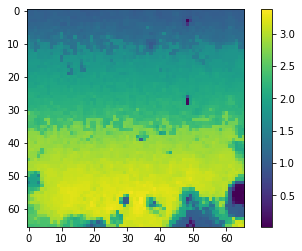

In [104]:
sx,sy = 2000,2000
resc = 30
Xim = np.indices([sx//resc,sy//resc]).reshape([2,-1]).T*resc

from scipy.spatial import KDTree
tree = KDTree(X1fs[:,1:])
dneigh,ineigh = tree.query(Xim,k=50)
dif = X2fs-X1fs
dM = dif[ineigh]
ddist = 200
dM[dneigh>ddist]=np.nan
ddif = np.nanmedian(dM,axis=1)
imT =ddif.reshape([sx//resc,sy//resc,3])[:,:,1]
plt.imshow(imT)
plt.colorbar()

In [8]:
def calc_color_matrix(x,yd,order=2):
    """This gives a quadratic color transformation (in matrix form)
    x is Nx3 vector of positions in the reference channel (typically cy5)
    yd is the Nx3 vector of positions in another channel - the reference (i.e. cy7-cy5)
    return m_ a 3x7 matrix which when multipled with x,x**2,1 returns y-x
    This m_ is indended to be used with apply_colorcor
    """ 
    x_ = np.array(x)# ref zxy
    y_ = np.array(yd)# dif zxy
    good = ~np.any(np.isnan(y_),axis=-1)
    x_ = x_[good]
    y_ = y_[good]
    
    # get a list of exponents
    exps = []
    for p in range(order+1):
        for i in range(p+1):
            for j in range(p+1):
                if i+j<=p:
                    exps.append([i,j,p-i-j])
    # construct A matrix
    A = np.zeros([len(x_),len(exps)])
    for iA,(ix,iy,iz) in enumerate(exps):
        s = (x_[:,0]**ix*x_[:,1]**iy*x_[:,2]**iz)
        A[:,iA]=s
    m_ = [np.linalg.lstsq(A, y_[:,iy])[0] for iy in range(len(x_[0]))]
    m_=np.array(m_)
    return m_
def apply_colorcor(x,m=None):
    """This applies chromatic abberation correction to order 2
    x is a Nx3 vector of positions (typically 750(-->647))
    m is a matrix computed by function calc_color_matrix
    y is the corrected vector in another channel"""
    if m is None:
        return x
    exps = []
    order_max=10
    for p in range(order_max+1):
        for i in range(p+1):
            for j in range(p+1):
                if i+j<=p:
                    exps.append([i,j,p-i-j])
    #find the order
    mx,my = m.shape
    order = int((my-1)/mx)
    assert(my<len(exps))
    x_ = np.array(x)
    # construct A matrix
    exps = exps[:my]
    A = np.zeros([len(x_),len(exps)])
    for iA,(ix,iy,iz) in enumerate(exps):
        s = (x_[:,0]**ix*x_[:,1]**iy*x_[:,2]**iz)
        A[:,iA]=s
    diff = [np.dot(A,m_) for m_ in m]
    return x_+np.array(diff).T

In [102]:
Xim_ = Xim[:,[0,0,1]]
Xim_[:,0]=0
m = calc_color_matrix(Xim_,ddif,order=1)

C:\Users\Scope2\AppData\Local\Temp\ipykernel_24836\4078241219.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_ = [np.linalg.lstsq(A, y_[:,iy])[0] for iy in range(len(x_[0]))]


In [103]:
np.save(r'S:\ZaneTrit_3_3_2023_analysis\chromatic_abberation_matrix_Scope2DC60xobj.npy',m)

C:\Users\Scope2\AppData\Local\Temp\ipykernel_24836\4078241219.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_ = [np.linalg.lstsq(A, y_[:,iy])[0] for iy in range(len(x_[0]))]


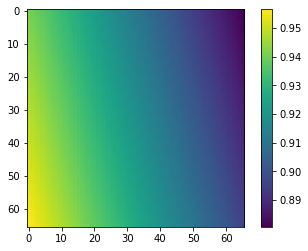

In [98]:

XimT_ = apply_colorcor(Xim_,m=m)

imTR = (XimT_-Xim_)[:,0].reshape(imT.shape)

plt.imshow(imTR)
plt.colorbar()

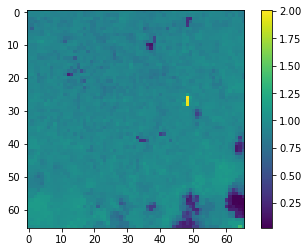

In [100]:
imT =ddif.reshape([sx//resc,sy//resc,3])[:,:,0]
plt.imshow(imT)
plt.colorbar()

In [64]:
import napari
v = napari.view_points(X1fs[:,1:],face_color='g',blending='additive')
v.add_points(X2fs[:,1:],face_color='r',blending='additive')
v.add_points(Xim)

C:\Users\Scope2\anaconda3\lib\site-packages\napari_tools_menu\__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Points layer 'Xim' at 0x1edc3003df0>